**Linear Regression  ---> Understanding Polynomial Feature and Finding the Polynomial Degree using for-LOOP**

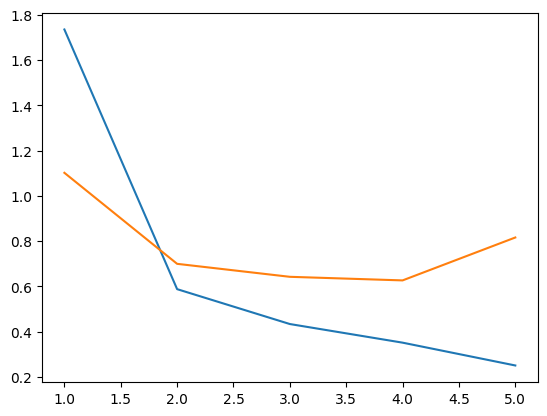

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as m_plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from joblib import dump, load

# Data
dataFrame = pd.read_csv("Advertising.csv")
# dataFrame.head()
x_dataFrame = dataFrame.drop('sales',axis=1)
y_dataFrame = dataFrame['sales']

# Best Poly Degree...
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_convertor = PolynomialFeatures(degree=d,include_bias=False)
    polyFit = poly_convertor.fit_transform(x_dataFrame,y_dataFrame)

    X_train, X_test, y_train, y_test = train_test_split(polyFit,y_dataFrame,test_size=0.3,random_state=101)

    model = LinearRegression()
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))
    test_rmse = np.sqrt(mean_absolute_error(y_pred=test_pred,y_true=y_test))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

m_plot.plot(range(1,6), train_rmse_errors[:5])
m_plot.plot(range(1,6), test_rmse_errors[:5])


In [28]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)     # --> Dump
final_poly_fit = final_poly_converter.fit_transform(x_dataFrame,y_dataFrame)

X_train, X_test, y_train, y_test = train_test_split(final_poly_fit,y_dataFrame,test_size=0.3,random_state=101)

final_model = LinearRegression()
final_model.fit(X_train,y_train)
#  final_model    ---> dump

poly_dump = dump(final_poly_converter,"final_poly_convertor.joblib")
finalModel = dump(final_model,"Final_Sales_Model.joblib")


**Usage Of joblib file**

In [29]:
from joblib import load
load_poly_convertor_model = load("final_poly_convertor.joblib")
load_final_model = load("Final_Sales_Model.joblib")

u1 = int(input("Enter the tv sales : "))
u2 = int(input("Enter the radio sales : "))
u3 = int(input("Enter the newspaper sales : "))
campain = [[149,22,12]]
value = load_poly_convertor_model.fit_transform(campain)
load_final_model.predict(value)

array([14.62125519])